In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink"]

In [7]:
jpeg_cha = pd.read_csv("../measurements/jpeg_sparsity/characteristic.csv")
reg_cha = pd.read_csv("../measurements/regression_sparsity/characteristic.csv")
# decom_cha = pd.read_csv("../measurements/decomposition_snr_cha/characteristic.csv")

In [16]:
jpeg_cha.head()

,pruning_thresh,target_sparsity,quality,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_evm,reconstruct_snr
0,0.001,0.1,60,1,0.120608,-1,-1,-1,15313,16048,42.940336,7.342691
1,0.010,0.1,60,2,0.105099,-1,-1,-1,9530,10265,40.318211,7.889975
2,0.010,0.1,60,3,0.107341,-1,-1,-1,15498,16233,31.799623,9.951560
3,0.010,0.1,60,4,0.103839,-1,-1,-1,10065,10800,31.271766,10.096952
4,0.011,0.1,60,5,0.109953,-1,-1,-1,3639,4374,31.777305,9.957658


In [4]:
sparsity = [ 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# sparsity = [ 0.91, 0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
# sparsity = [ 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.91, 0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
quality = [60,70,80,90,100]

x=[]
y=[]
z=[]
z_std=[]
cha_df_group =jpeg_cha.groupby("target_sparsity")
for p in sparsity:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(cha_plot_df["sparsity"].mean())
        y.append(p)
        z.append(cha_plot_df["reconstruct_snr"].mean())
        z_std.append(cha_plot_df["reconstruct_snr"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
z_std = np.array(z_std)
X, Y = np.meshgrid( quality,sparsity)
Z = z.reshape(Y.shape)
Z_std = z_std.reshape(Y.shape)

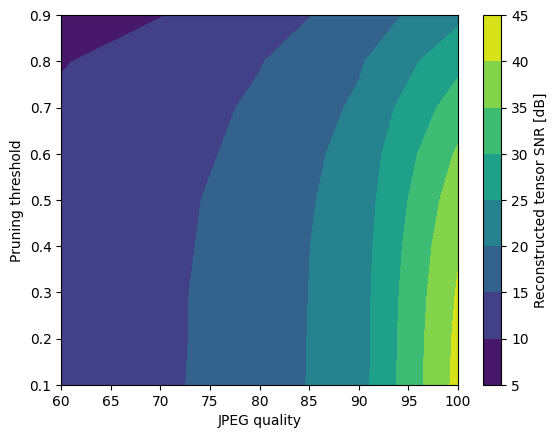

In [5]:

plt.figure()
plt.contourf(X, Y, Z)
plt.xlabel("JPEG quality")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR [dB]")


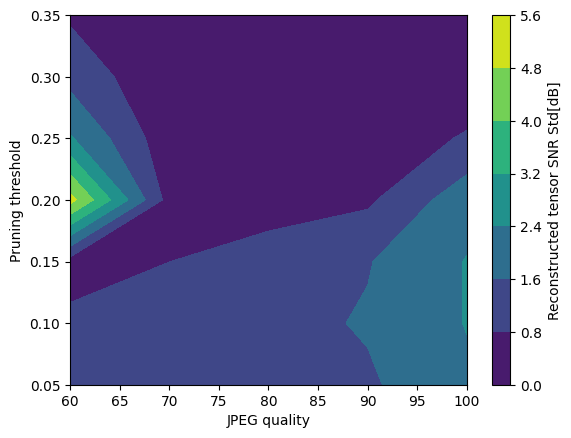

In [6]:
plt.figure()
plt.contourf(X, Y, Z_std)
plt.xlabel("JPEG quality")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR Std[dB]")

In [8]:
sparsity = [ 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
quality = [1,2,3,4,5]

x=[]
y=[]
z=[]
z_std=[]
cha_df_group =reg_cha.groupby("target_sparsity")
for p in sparsity:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(q)
        y.append(p)
        z.append(cha_plot_df["reconstruct_snr"].mean())
        z_std.append(cha_plot_df["reconstruct_snr"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
z_std = np.array(z_std)
X, Y = np.meshgrid( quality,pruning)
Z = z.reshape(Y.shape)
Z_std = z_std.reshape(Y.shape)


KeyError: 0.6

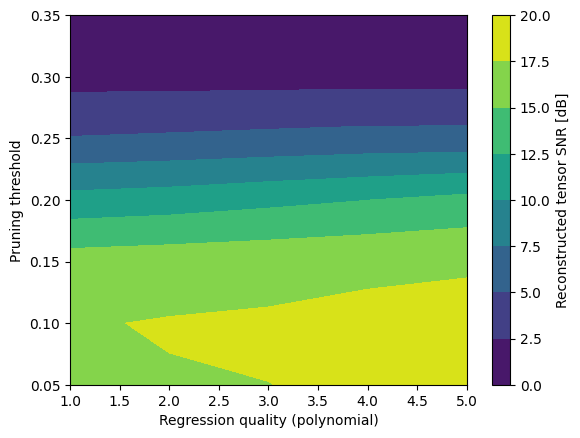

In [8]:
plt.figure()
plt.contourf(X, Y, Z)
plt.xlabel("Regression quality (polynomial)")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR [dB]")

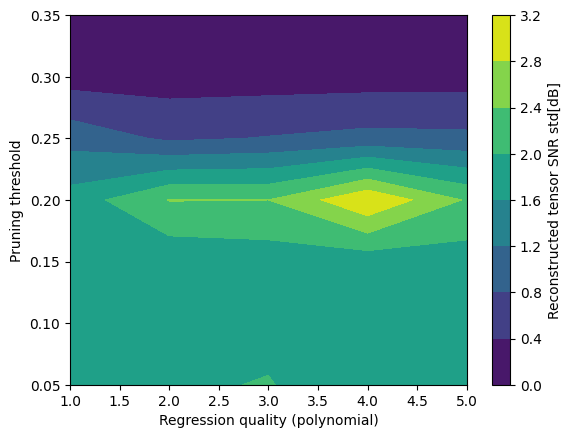

In [9]:
plt.figure()
plt.contourf(X, Y, Z_std)
plt.xlabel("Regression quality (polynomial)")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR std[dB]")

In [10]:
pruning = [0.05, 0.1, 0.15, 0.2, 0.25,0.3,0.35]
# pruning = [0.05, 0.1, 0.15,0.2,0.25]
quality = [2,4,6,8,10]

x=[]
y=[]
z=[]
z_std=[]
cha_df_group =decom_cha.groupby("pruning_thresh")
for p in pruning:
    cha_df = cha_df_group.get_group(p)
    cha_quality_df = cha_df.groupby("quality")
    for q in quality:
        cha_plot_df= cha_quality_df.get_group(q)
        x.append(q)
        y.append(p)
        z.append(cha_plot_df["reconstruct_snr"].mean())
        z_std.append(cha_plot_df["reconstruct_snr"].std())

x = np.array(x)
y = np.array(y)
z = np.array(z)
z_std = np.array(z_std)
X, Y = np.meshgrid( quality,pruning)
Z = z.reshape(Y.shape)
Z_std = z_std.reshape(Y.shape)

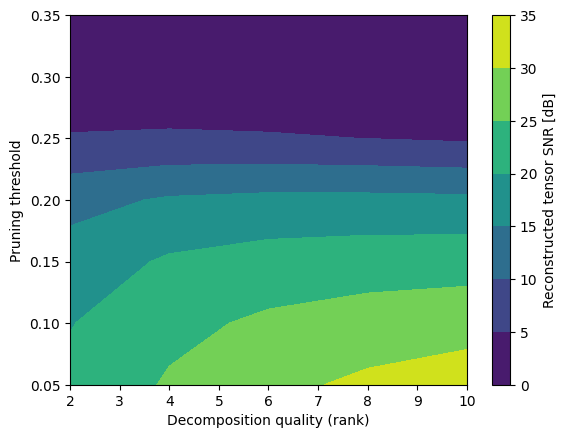

In [11]:
plt.figure()
plt.contourf(X, Y, Z)
plt.xlabel("Decomposition quality (rank)")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR [dB]")

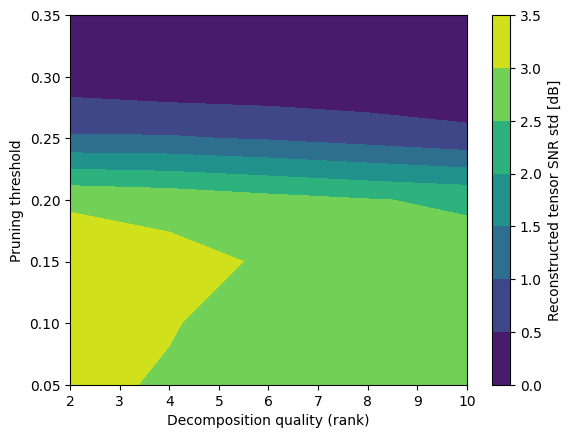

In [12]:
plt.figure()
plt.contourf(X, Y, Z_std)
plt.xlabel("Decomposition quality (rank)")
plt.ylabel("Pruning threshold")
plt.colorbar(label="Reconstructed tensor SNR std [dB]")